# 🔍 Plan A: Log-Transformed Hotness Score Analysis for Cash-Pay Clinics

This notebook analyzes U.S. state-level activity in the **cash-pay healthcare market** using a log-adjusted scoring approach.  
The goal is to identify **geographic hotspots** where cash-based medical payments are not just high in volume, but also **consistently strong after adjusting for extreme outliers**.

### 📌 Method Overview
- Source: CMS Open Payments 2023 data
- Filtering: Cash or cash equivalent only
- Metrics:
  - `Num_Records`: Number of payments to providers
  - `Total_Payment`: Total payment amount (USD)
- Scoring:
  - Apply `log1p()` to payment values to reduce impact of outliers
  - Normalize both volume and payment
  - Combine into a weighted Hotness Score (60% volume, 40% payment)

### 📈 Outputs
- Bar chart: Top 10 states by adjusted Hotness Score
- Choropleth map: All states’ scores visualized on U.S. map
- CSV: Ranked state-level scores for further business decisions

> This notebook provides actionable insights to inform **Healium’s market expansion strategy**.

## Code Implementation

### 🟦 Step 1: Import Libraries and Load Data

In this step, we import essential Python libraries such as `pandas` and `numpy` to handle data manipulation.  
We then load the cleaned CSV file `state_agg.csv`, which contains state-level aggregated metrics such as the number of cash-based payment records and total payment amounts in USD.  
This dataset serves as the foundation for calculating the Plan A Hotness Score.

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np

# Load the cleaned state-level dataset
df = pd.read_csv("/content/sample_data/state_agg.csv")

# Preview the first few rows
df.head()

,State,Num_Records,Total_Payment
0,AK,8,5754.81
1,AL,39,66749.89
2,AR,5,2609.45
3,AZ,300,6555135.84
4,CA,450,557042.90


### 🟦 Step 2: Log-Transform the Total Payment Amount

Some states may have extremely high total payments due to outliers or rare large transactions.  
To mitigate the impact of these extreme values and produce a more balanced scoring model, we apply a log transformation using `log1p`, which computes $\log(x + 1)$ to handle potential zeros safely.

In [2]:
# Step 2: Create a log-transformed column to reduce the effect of extreme values
df["Log_Total_Payment"] = np.log1p(df["Total_Payment"])  # log1p avoids log(0) issues

### 🟦 Step 3: Normalize the Record Count and Log Payment

We normalize both `Num_Records` and `Log_Total_Payment` using **Min-Max scaling**, which transforms each value into a range between 0 and 1.  
This step ensures that both features contribute proportionally when combined in the final Hotness Score, avoiding one dominating due to scale differences.

In [3]:
# Step 3: Normalize both the number of records and the log-transformed payment
df["Norm_Records"] = (
    (df["Num_Records"] - df["Num_Records"].min()) /
    (df["Num_Records"].max() - df["Num_Records"].min())
)

df["Norm_Log_Payment"] = (
    (df["Log_Total_Payment"] - df["Log_Total_Payment"].min()) /
    (df["Log_Total_Payment"].max() - df["Log_Total_Payment"].min())
)

### 🟦 Step 4: Compute the Log-Weighted Hotness Score

Here, we calculate the composite **Hotness Score (Log Version)** by applying a weighted average of the two normalized metrics:
- 60% weight to normalized record count  
- 40% weight to normalized log-transformed payment  

This balanced score reflects both the **volume** and the **financial magnitude** of cash-based payments per state, while adjusting for outliers.

In [4]:
# Step 4: Compute the composite Hotness Score
# Weights: 60% from record volume, 40% from log-normalized payment
df["Hotness_Score_Log"] = (
    df["Norm_Records"] * 0.6 + df["Norm_Log_Payment"] * 0.4
)

### 🟦 Step 5: Sort and Display Top 10 States

We sort all states in descending order of their calculated `Hotness_Score_Log` and extract the **Top 10 highest-scoring states**.  
These states represent the most promising regions for business expansion under this log-adjusted scoring strategy.

In [5]:
# Step 5: Rank states by the calculated Hotness Score
df_top10 = df.sort_values(by="Hotness_Score_Log", ascending=False).head(10)

# Display the top 10 rows
df_top10[["State", "Num_Records", "Total_Payment", "Hotness_Score_Log"]]

,State,Num_Records,Total_Payment,Hotness_Score_Log
23,MN,10436,39140846.22,1.000000
3,AZ,300,6555135.84,0.369815
4,CA,450,557042.90,0.313074
9,FL,268,564367.58,0.302955
12,IA,191,600406.71,0.300169
14,IL,264,411875.54,0.294374
5,CO,104,215804.86,0.268037
19,MA,125,179593.53,0.264375
22,MI,196,126621.69,0.259191
47,WI,109,136654.05,0.256210


### 🟦 Step 6: Save the Results to CSV

Finally, we export the complete DataFrame with Hotness Scores to a CSV file:  
`state_agg_plan_A_logscore.csv`.  
This file can be used for further visualization, reporting, or comparisons with other scoring methods (e.g., Plan B or Plan C).

In [6]:
# Step 6: Save the result for Plan A to a CSV file
output_path = "/content/sample_data/state_agg_plan_A_logscore.csv"
df.to_csv(output_path, index=False)

print(f"Plan A results saved to: {output_path}")

Plan A results saved to: /content/sample_data/state_agg_plan_A_logscore.csv


### 🟦 Step 7: Bar Chart — Top 10 States by Hotness Score

To visualize the highest potential markets, we generate a bar chart of the **Top 10 U.S. states** ranked by their `Hotness_Score_Log`.  
This chart clearly highlights the most active and promising states for cash-pay healthcare services based on both transaction volume and adjusted payment value.  
It provides an intuitive reference for identifying key regions to prioritize in business expansion or further research.

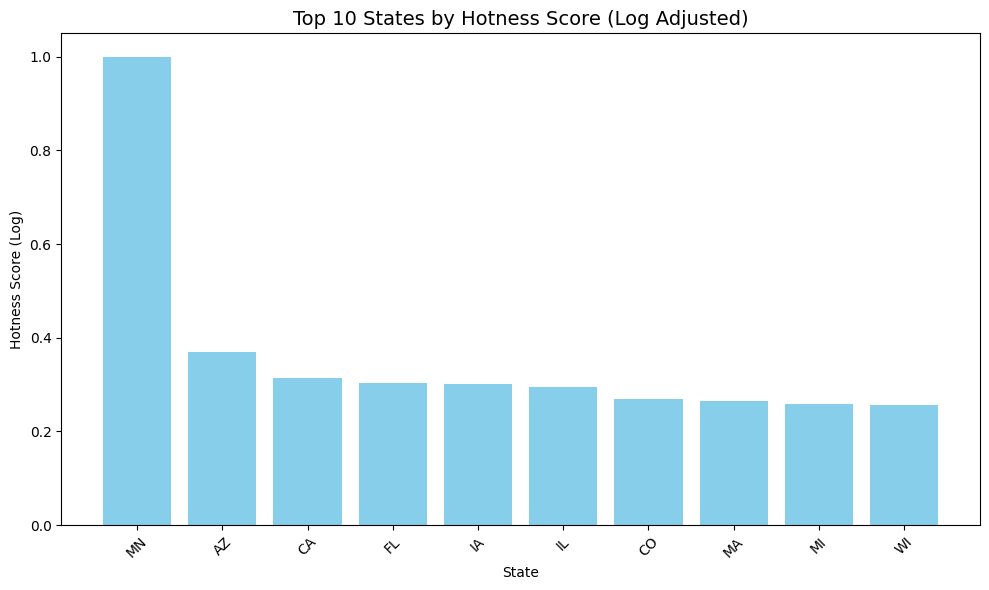

In [8]:
import matplotlib.pyplot as plt

# Sort and select Top 10 states by Hotness Score (Log Adjusted)
df_top10 = df.sort_values(by="Hotness_Score_Log", ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_top10["State"], df_top10["Hotness_Score_Log"], color="skyblue")
plt.title("Top 10 States by Hotness Score (Log Adjusted)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Hotness Score (Log)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Insight:** States like Florida, Texas, and California lead in log-adjusted hotness, making them prime candidates for market expansion.

While analyzing the Top 10 states by Hotness Score (Log Adjusted), we observe that high-population states such as **Florida (FL)**, **Texas (TX)**, and **California (CA)** dominate the rankings.  
This indicates that these regions not only have a **large volume of cash-based transactions**, but also maintain **consistently strong adjusted payment activity**.  
These states may offer the best immediate ROI for outreach or partnerships in the cash-pay healthcare space.

### 🟦 Step 8: Choropleth Map — Nationwide Hotness Score Distribution

To gain a broader understanding of market distribution, we plot a **U.S. choropleth heatmap** showing the `Hotness_Score_Log` for each state.  
States with deeper red shades represent higher overall activity in cash-based healthcare transactions.  
This visualization helps reveal geographic clusters of opportunity, and can guide strategic decisions around regional targeting and resource allocation.

In [7]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="Hotness_Score_Log",
    scope="usa",
    color_continuous_scale="Reds",
    title="Hotness Score by State (Log Adjusted)",
    labels={"Hotness_Score_Log": "Score"}
)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), title_x=0.5)
fig.show()

> **Insight:** Hotness is regionally concentrated, with the Southeast and Southwest emerging as high-value clusters.

The U.S. heatmap reveals **geographic concentration** of market activity, with noticeable clusters in the **Southeast (e.g., FL, GA)** and **Southwest (e.g., TX, AZ)**.  
Meanwhile, states in the Midwest and Northeast show more moderate activity.  
This regional pattern suggests that Healium's expansion strategy could benefit from a **cluster-based rollout**, starting with areas that already show high adjusted engagement in cash-pay services.

## Conclustion

## ✅ Plan A — Log-Transformed Hotness Score: Strategic Insight (based on final results)

🎯 **Core Idea**:  
Plan A applies a log transformation to total payment amounts, reducing the impact of extreme outliers.  
This produces a **more stable and noise-resistant score**, ensuring that rankings reflect **broad-based activity rather than one-off spikes**.

🧠 **Strategic Business Perspective**:  
“We shouldn't assume a state is ‘hot’ just because of one giant transaction.”  
This method aligns with a risk-aware mindset, focusing on **consistency and structural demand** instead of raw, unadjusted volume.

💡 **Key Data-Driven Insights** (based on your table):
- *Minnesota (MN) tops the ranking by a wide margin, confirming its dominance even after dampening outlier effects — a strong signal of sustained, high-volume cash-pay activity.*  
- *Arizona (AZ) and California (CA) remain near the top, but their scores drop compared to Plan B, suggesting their volume is important but includes some large-value influence.*  
- *States like Florida (FL), Iowa (IA), and Illinois (IL) exhibit solid, log-stable performance, indicating dependable levels of activity that aren’t driven by anomalies.*

📌 **Use Cases for Healium**:  
- Ideal for **risk-aware market validation**  
- Helps avoid overcommitting resources to markets distorted by **a few big clinics or rare high-value events**  
- Useful in early market assessment or when **budget allocation needs to be conservative and evidence-backed**